In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('dataframe_images.pkl')
df['condition'] = df.apply(lambda row : '_'.join(row.name.rsplit('_')[2:-3]), axis = 1)
df.sample(1)


image  \
full_label                                                                          
JC_Plate2_mcp_low_26_nucleus_3  [[[False, False, False, False, False, False, F...   

                                                                            slice  \
full_label                                                                          
JC_Plate2_mcp_low_26_nucleus_3  [(slice(0, 12, None), slice(0, 113, None), sli...   

                                                                  intensity_image  \
full_label                                                                          
JC_Plate2_mcp_low_26_nucleus_3  [[[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...   

                                                                     convex_image  \
full_label                                                                          
JC_Plate2_mcp_low_26_nucleus_3  [[[False, False, False, False, False, False, F...   

                               condition  
full_label                                
JC_Plate2_mcp_low_26_nucleus_3   mcp_low

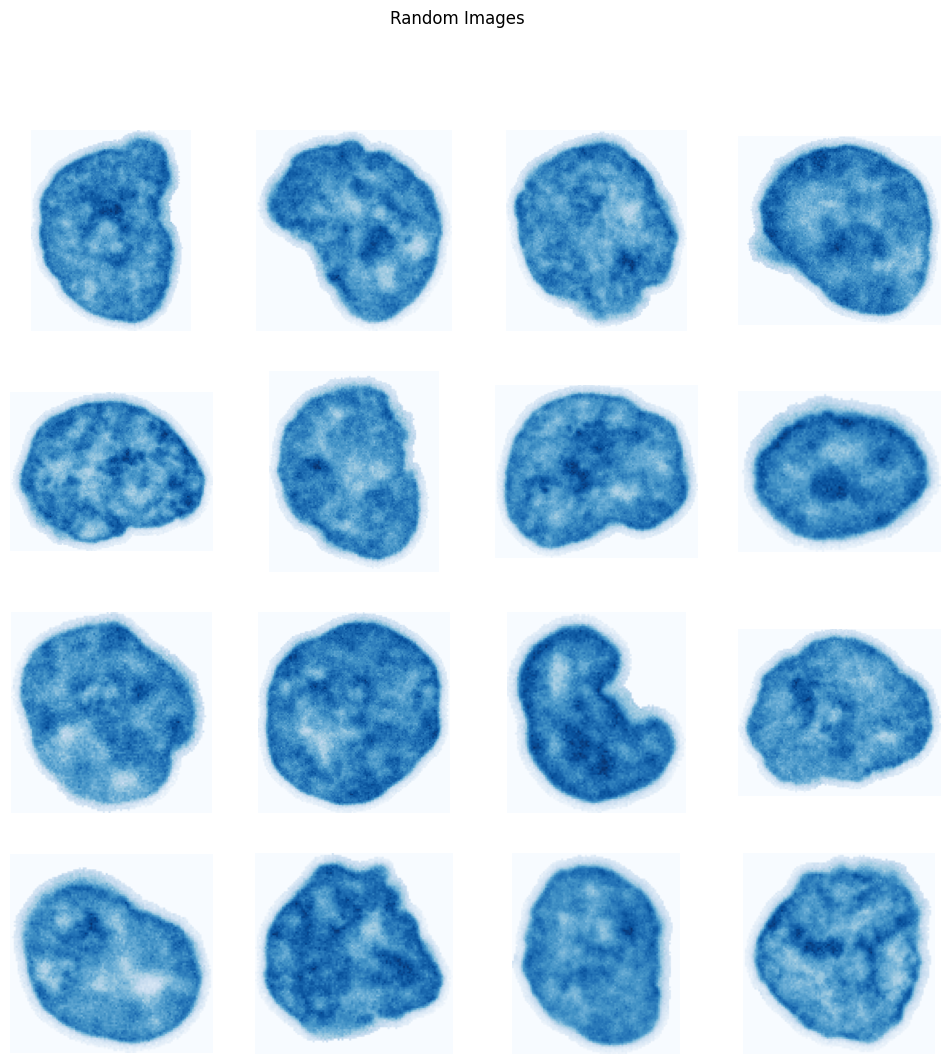

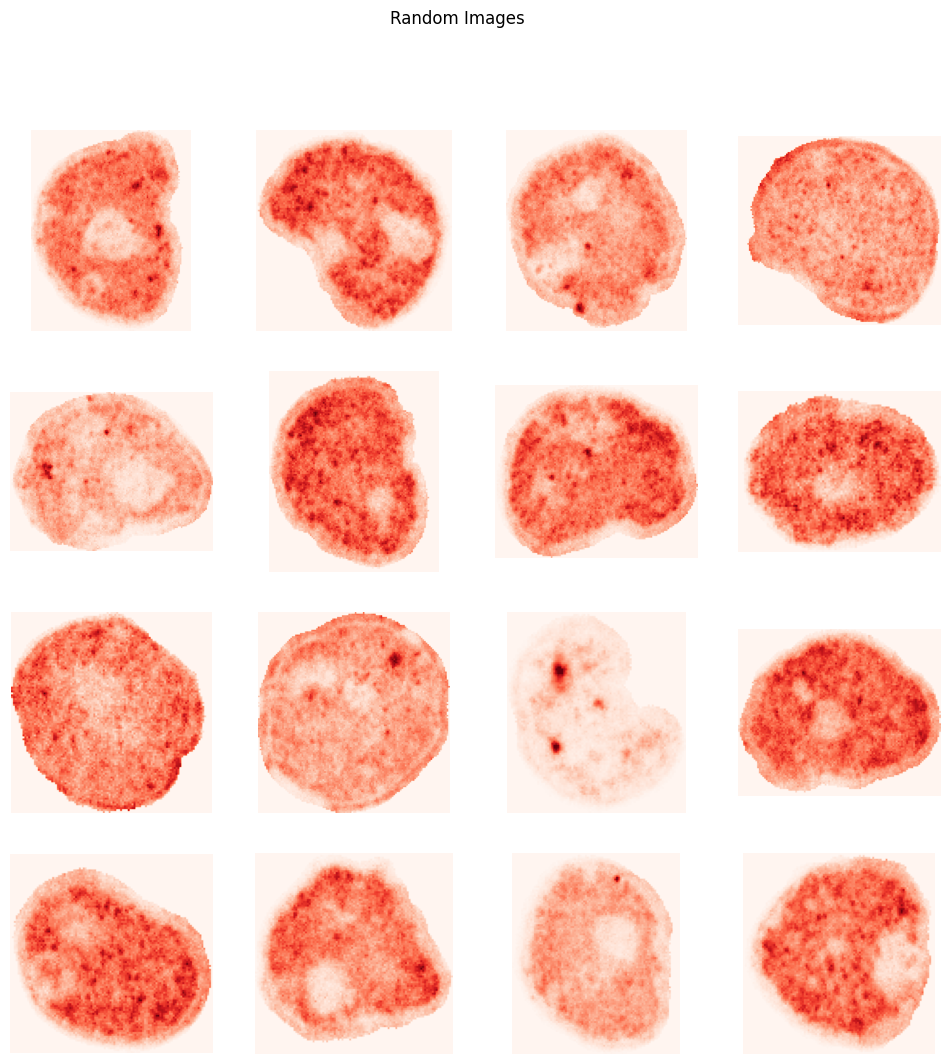

In [2]:
# Define a function to plot a collage of random images
def plot_random_images(images, title, cmap, channel):
    num_images = len(images)
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle(title)
    for i in range(4):
        for j in range(4):
            if i * 4 + j < num_images:
                axes[i, j].imshow(images[i * 4 + j][:,:,channel], cmap=cmap)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
    plt.show()

# Iterate over each group
# Select the middle z-stack of each image
images = [image for image in df['intensity_image'].apply(lambda x: x[x.shape[0] // 2, :, :, :])]

# Select 16 random images if available, else select all
i_selected_images = np.random.choice(np.arange(0, len(images)), size=16, replace=False)
selected_images_2 = [images[i] for i in i_selected_images] 

# Plot the collage
plot_random_images(selected_images_2, f'Random Images ', 'Blues', 0)
plot_random_images(selected_images_2, f'Random Images ', 'Reds', 2)



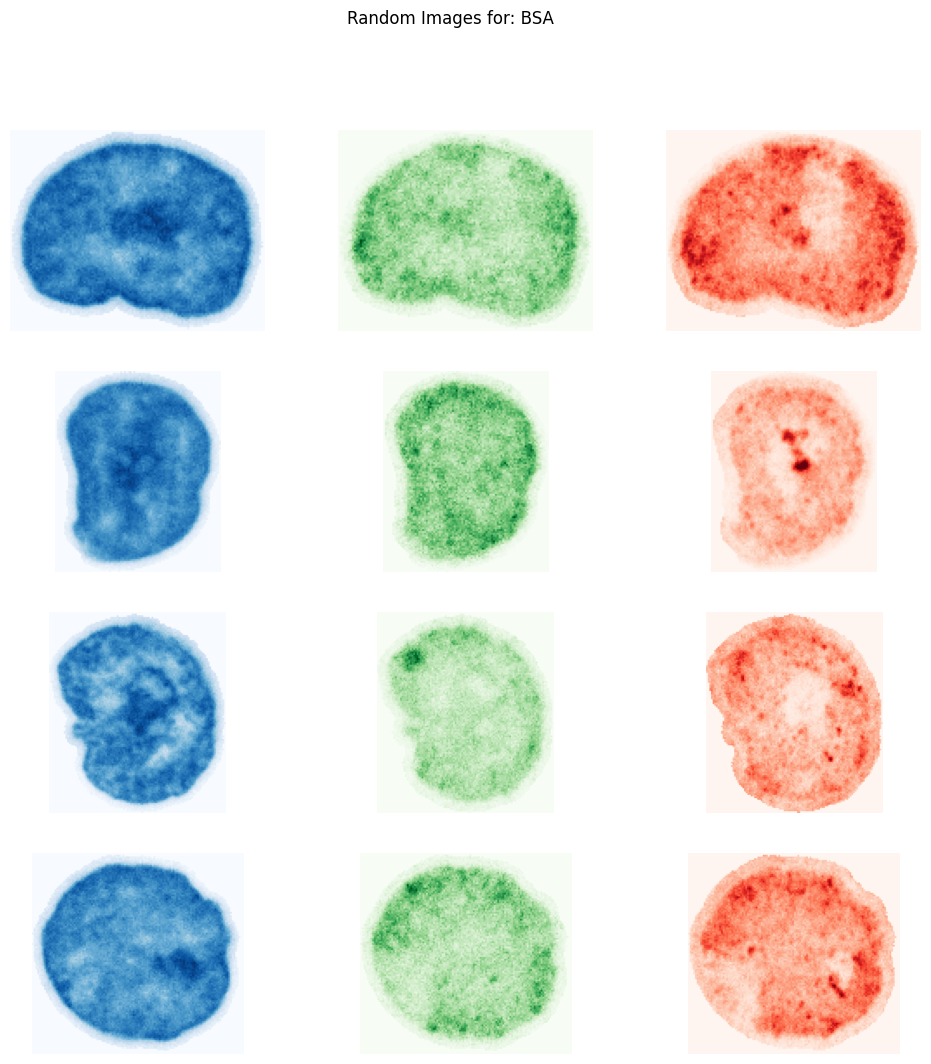

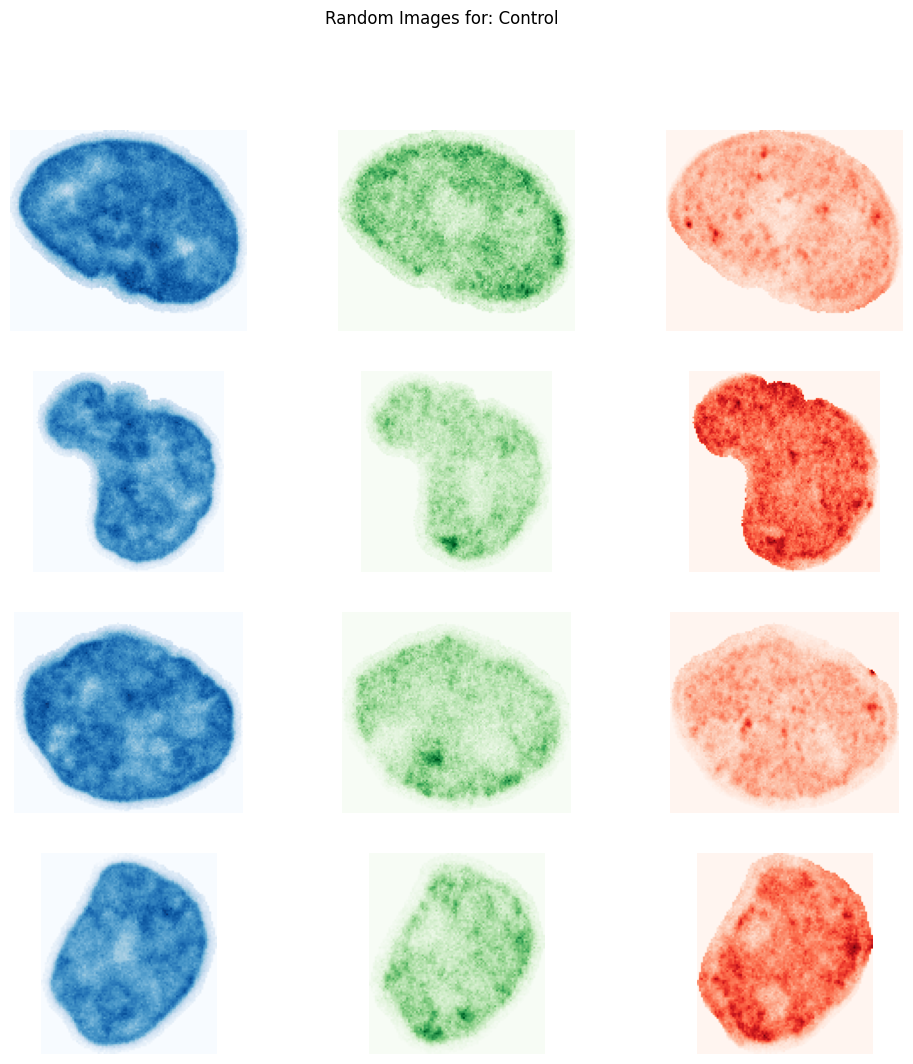

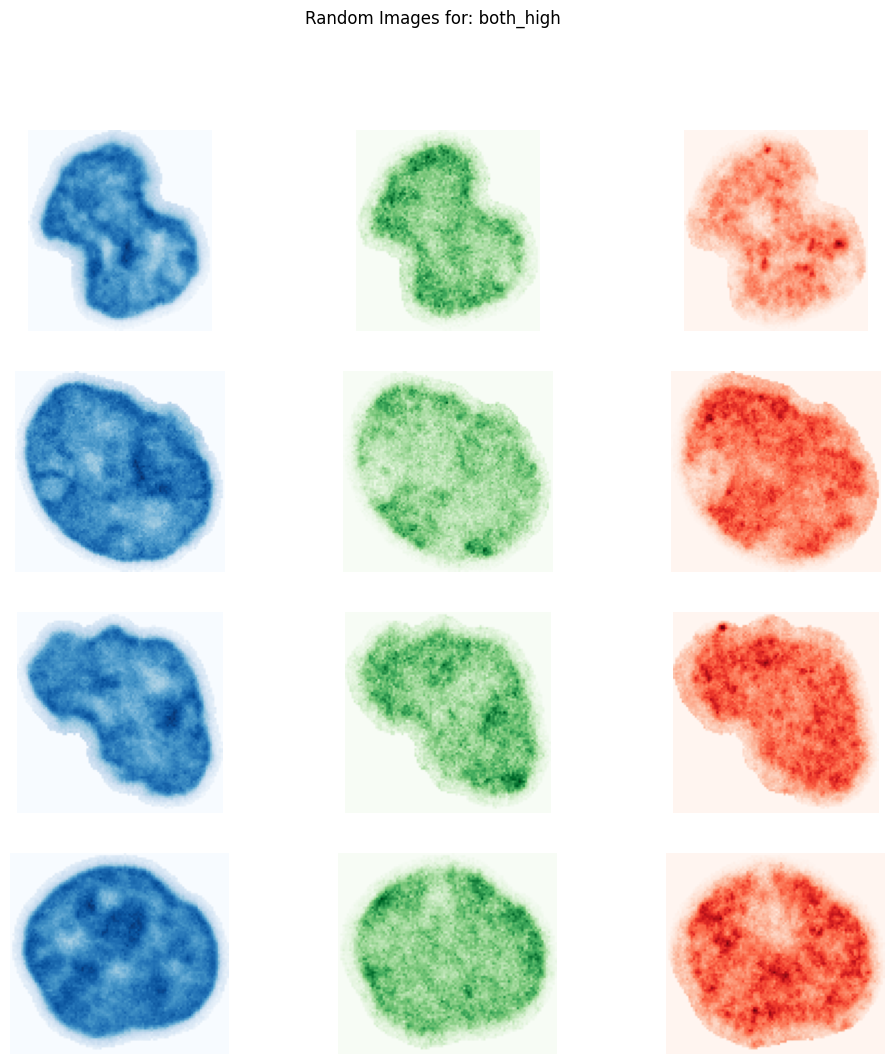

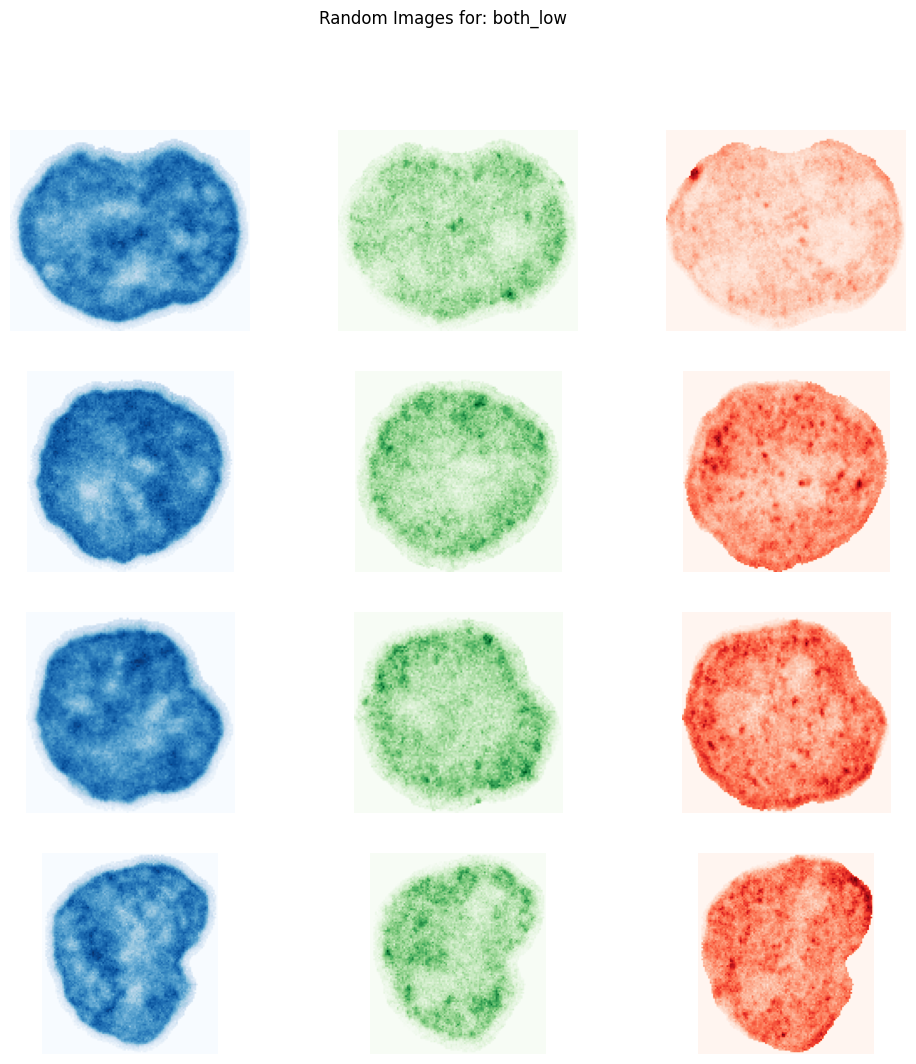

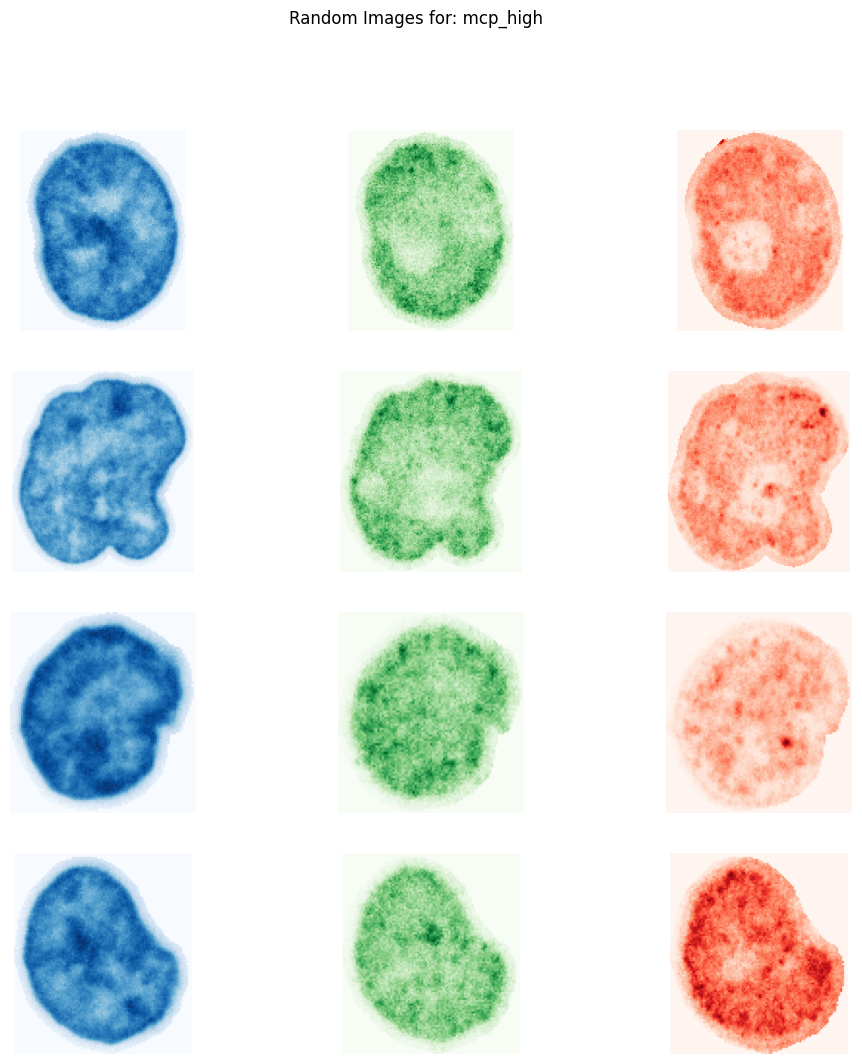

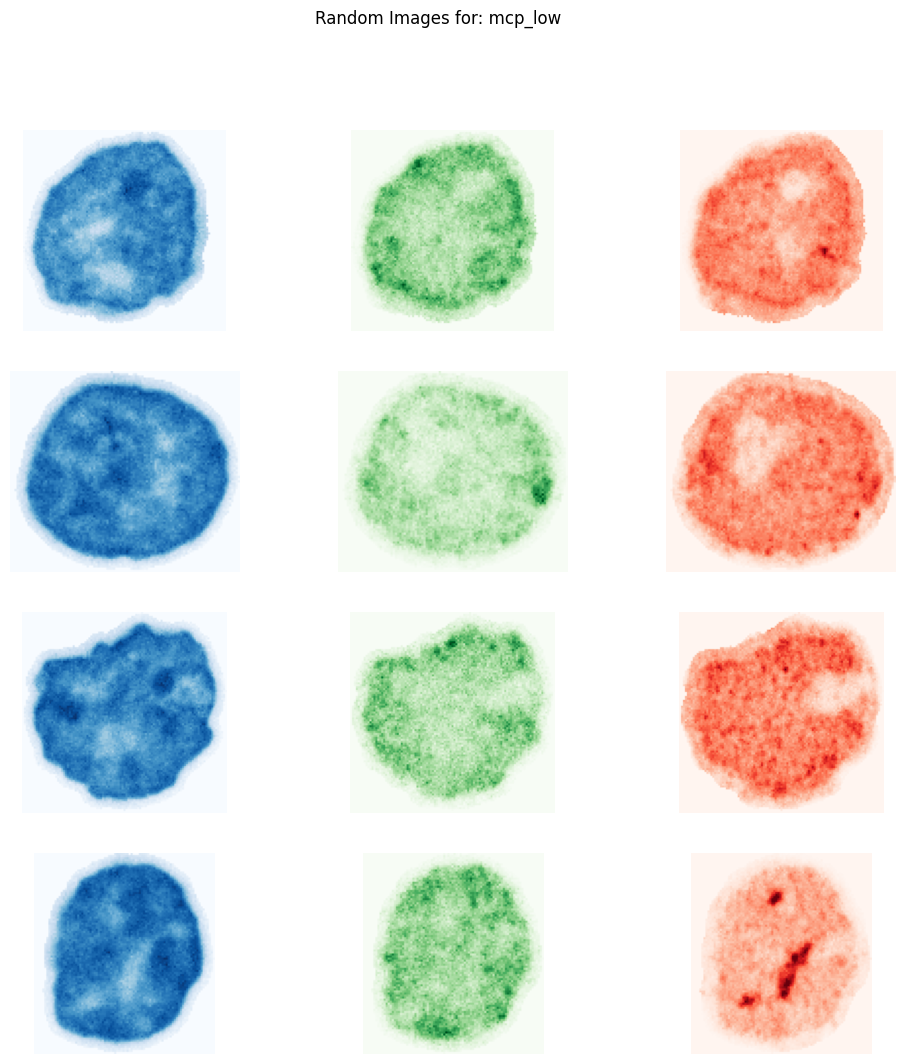

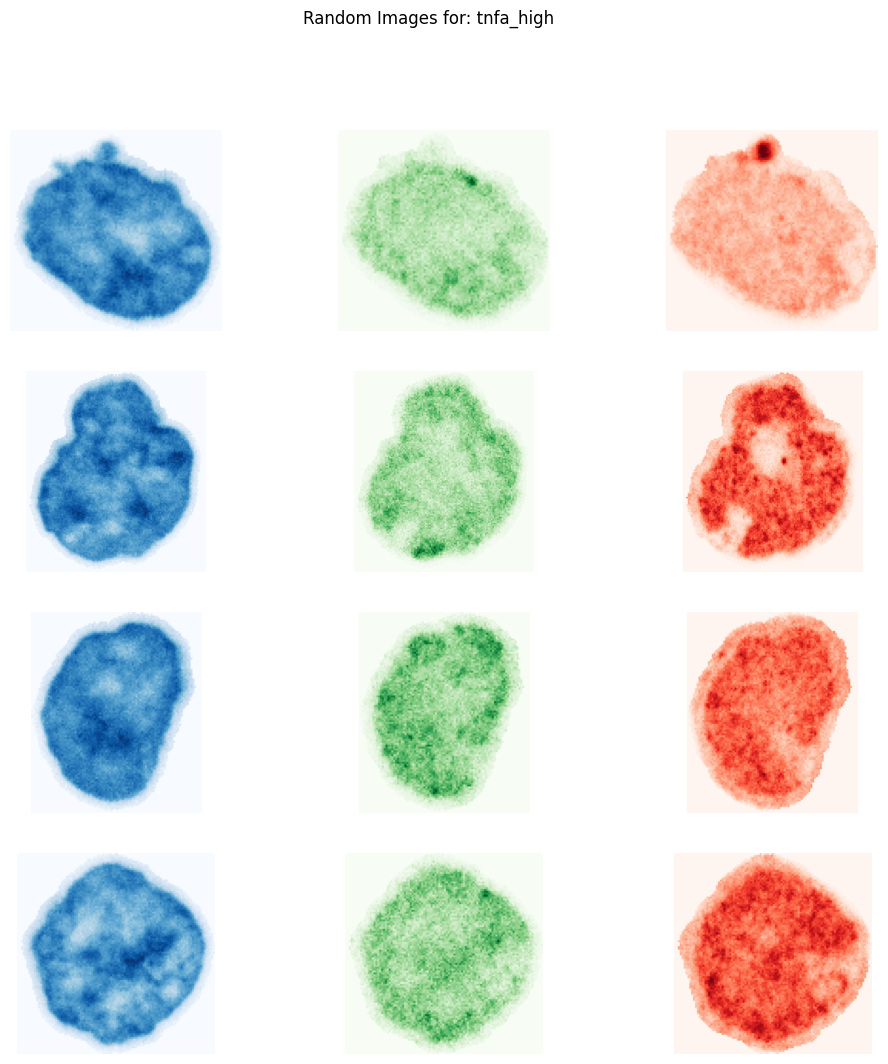

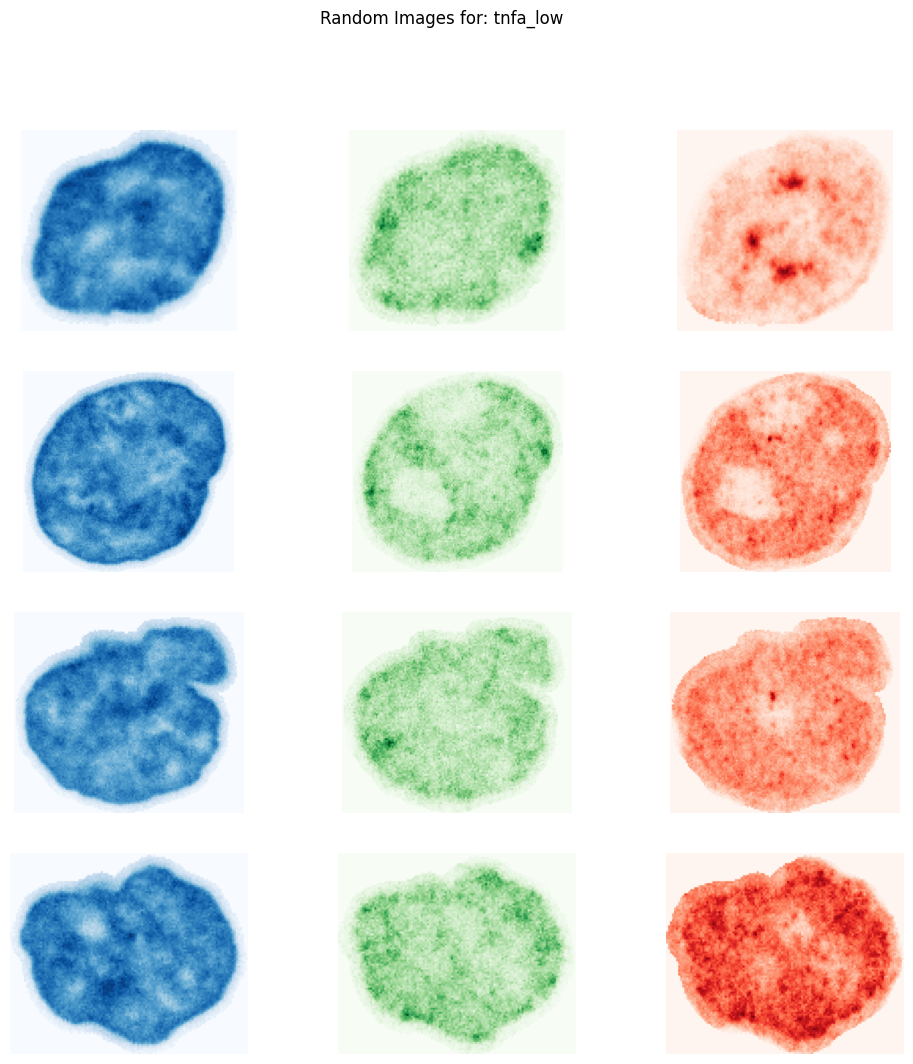

In [3]:
# Define a function to plot a collage of random images
def plot_random_images(images, title, cmap, channel):
    cmaps = ['Blues', 'Greens', 'Reds']
    num_images = len(images)
    fig, axes = plt.subplots(4, 3, figsize=(12, 12))
    fig.suptitle(title)
    for i in range(4):
        for j in range(3):
            if i * 4 + j < num_images:
                axes[i, j].imshow(images[i * 4][:,:,j], cmap=cmaps[j])
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
    plt.savefig(f"{title.replace(' ', '_')}.png")
    plt.show()

# Group the dataframe by 'condition'
grouped = df.groupby('condition')
# Iterate over each group
for condition, group in grouped:
    # Select the middle z-stack of each image
    images = [image for image in group['intensity_image'].apply(lambda x: x[x.shape[0] // 2, :, :, :])]
    
    # Select 16 random images if available, else select all
    i_selected_images = np.random.choice(np.arange(0, len(images)), size=16, replace=False)
    selected_images_2 = [images[i] for i in i_selected_images] 
    
    # Plot the collage
    plot_random_images(selected_images_2, f'Random Images for: {condition}', 'Blues', 0)

